In [1]:
import csv
from collections import defaultdict
import tensorflow as tf
import tflearn
from random import sample
import numpy as np
from itertools import chain, repeat, islice

def pad_infinite(iterable, padding=None):
    return chain(iterable, repeat(padding))

def pad(iterable, size, padding=None):
    return list(islice(pad_infinite(iterable, padding), size))

In [2]:
DATA_PATH = "no_tiebreak_feature_data.csv"
LABELS_KEYS = ["match_winner","set_winner"]
FEATURE_KEYS = ["pt1","pt2","pt3","pt4","pt5","pt6",
                "deuce","ad_in","ad_out", "server", "returner",
                "game_winner"]

In [3]:
labels = {
    "1.0": [1, 0],
    "2.0": [0, 1]
}
# read in data
matches = defaultdict(lambda: {"features": [], "labels": []})
with open(DATA_PATH) as infile:
    reader = csv.DictReader(infile)
    for line in reader:
        match_id = line["match_id"]
        matches[match_id]["features"].append(
            [float(line[key]) for key in FEATURE_KEYS]
        )
        matches[match_id]["labels"] = labels[line["match_winner"]]

In [9]:
# now turn it into a matrix
xtrain, ytrain = [], []
xtest, ytest = [], []
train_ids, test_ids = [], []

blank_row = np.zeros(len(FEATURE_KEYS))

train_ids = sample(matches.keys(), int(0.8 * len(matches)))
for match_id in matches:
    for k in range(min(len(matches[match_id]["features"]), 50)):
        padded_features = pad(matches[match_id]["features"][:k], 50, blank_row)
        labels = matches[match_id]["labels"]
        if match_id in train_ids:
            xtrain.append(padded_features)
            ytrain.append(labels)
            train_ids.append(match_id)
        else:
            xtest.append(padded_features)
            ytest.append(labels)
            test_ids.append(match_id)
        
xtrain, ytrain = np.array(xtrain), np.array(ytrain)
xtest, ytest = np.array(xtest), np.array(ytest)

In [5]:
# Build neural network
net = tflearn.input_data(shape=[None, 50, len(FEATURE_KEYS)])
net = tflearn.lstm(net, 128)
net = tflearn.fully_connected(net, 2, activation="softmax")
net = tflearn.regression(net, optimizer='adam')

In [6]:
# train the model
model = tflearn.DNN(net)
model.fit(xtrain, ytrain, n_epoch=1, batch_size=256, show_metric=True)

Training Step: 261  | total loss: 0.49151
| Adam | epoch: 001 | loss: 0.49151 - acc: 0.7664 -- iter: 66611/66611
Training Step: 261  | total loss: 0.49151
| Adam | epoch: 001 | loss: 0.49151 - acc: 0.7664 -- iter: 66611/66611
--


In [ ]:
# evaluate model on test data
model.evaluate(xtest, ytest)

5450991.0


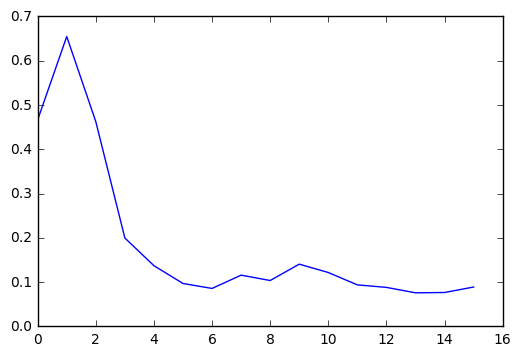


4387154.0


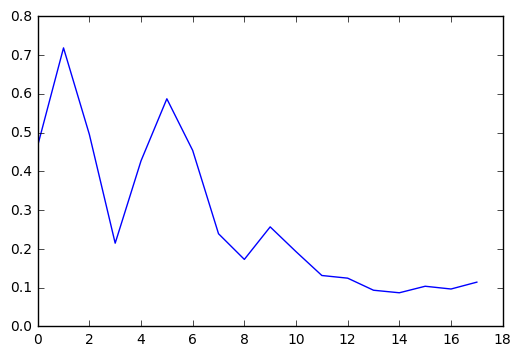


4800793.0


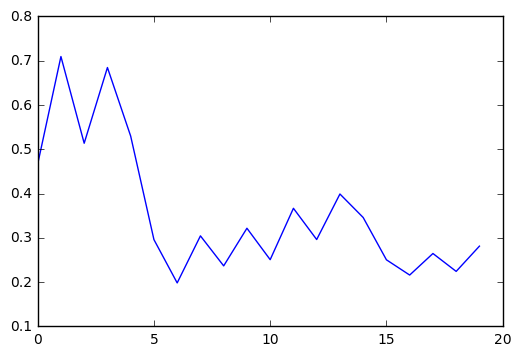

KeyboardInterrupt: 

In [13]:
# look at matches
import matplotlib.pyplot as plt

current_id = None
rows = []
for i, anid in enumerate(test_ids):
    if current_id and current_id != anid:
        print(current_id)
        plt.plot(np.array(model.predict(rows))[:, 0])
        plt.show()
        r = raw_input()
        rows = []
    rows.append(xtest[i])
    current_id = anid

In [ ]:
xtrain

In [ ]:
xtrain.shape

In [ ]:
ytrain.shape

In [ ]:
ytrain[0]

In [ ]:
matches[match_id]["features"]

In [ ]:
xtrain[15]

In [ ]:
ytrain[5]